In [1]:
import numpy as np
import pg
import system
import time
import math
import os
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import dg
plt.style.use('ggplot')

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
dataset = {
	'close0050':[],
	'openn0050':[],
	'adjopenn':[],
	'adjclose':[],
	'openn':[],
	'high':[],
	'low':[],
	'close':[],
	'volume':[],
	'turnover':[],
	'outstand':[],
	'mktc':[],
	'pe':[],
	'pb':[],
	'cdy':[],
	'fore':[],
	'it':[],
	'dler':[],
	'foreratio':[],
	'itratio':[],
	'dlerratio':[],
	'managerratio':[],
	'mortratio':[],
	'finb':[],
	'shortb':[],
	'fsratio':[],
	'rsv9':[],
	'k9':[],
	'd9':[],
	'ema12':[],
	'ema26':[],
	'dif':[],
	'dem':[],
	'bar':[],
	'ma5':[],
	'ma10':[],
	'ma20':[],
	'ma60':[],
	'ma120':[],
	'ma240':[],
	'vma5':[],
	'vma10':[],
	'vma20':[],
	'vma60':[],
	'vma120':[],
	'vma240':[],
	'ma13':[],
	'ma21':[],
	'ma55':[],
	'totalers':[],
	'ers1':[],
	'ers1to5':[],
	'ers5to10':[],
	'ers10to15':[],
	'ers15to20':[],
	'ers20to30':[],
	'ers30to40':[],
	'ers40to50':[],
	'ers50to100':[],
	'ers100to200':[],
	'ers200to400':[],
	'ers400to600':[],
	'ers600to800':[],
	'ers800to1000':[],
	'ers1000plus':[],
	'ratio1':[],
	'ratio1to5':[],
	'ratio5to10':[],
	'ratio10to15':[],
	'ratio15to20':[],
	'ratio20to30':[],
	'ratio30to40':[],
	'ratio40to50':[],
	'ratio50to100':[],
	'ratio100to200':[],
	'ratio200to400':[],
	'ratio400to600':[],
	'ratio600to800':[],
	'ratio800to1000':[],
	'above1000ratio':[],
	'totalerscombo':[],
	'to50ratio':[],
	'to50ratiocombo':[],
	'to100ratio':[],
	'to100ratiocombo':[],
	'above400ratio':[],
	'above400ratiocombo':[],
	'above1000ratiocombo':[],
	'per1000pluser':[],
	'ers400plus':[],
	'per400pluser':[],
	'other400':[],
	'other400combo':[],
	'publish':[],
	'rev':[],
	'lyrev':[],
	'yoy':[],
	'mom':[],
	'accrev':[],
	'accrevyoy':[],
	'yoycombo':[],
	'momcombo':[],
	'accrevyoycombo':[],
	'breakhigh':[],
	'cash':[],
	'conta':[],
	'ar':[],
	'inv':[],
	'ca':[],
	'ppe':[],
	'nca':[],
	'totala':[],
	'shortdebt':[],
	'contl':[],
	'ap':[],
	'cl':[],
	'longdebt':[],
	'ncl':[],
	'totall':[],
	'equitycap':[],
	'quarrev':[],
	'gross':[],
	'opex':[],
	'rdex':[],
	'opgain':[],
	'incomebeftax':[],
	'eps':[],
	'roe':[],
	'grossmargin':[],
	'opmargin':[],
	'ibtmargin':[],
	'iatmargin':[],
	'opexmargin':[],
	'rdexmargin':[],
	'curratio':[],
	'quickratio':[],
	'debtratio':[],
	'arday':[],
	'invday':[],
	'apday':[],
	'grossmargindy':[],
	'grossmargindq':[],
	'opmargindy':[],
	'opmargindq':[],
	'iatmargindy':[],
	'iatmargindq':[],
	'ibtmargindy':[],
	'ibtmargindq':[],
	'ardaydy':[],
	'ardaydq':[],
	'invdaydy':[],
	'invdaydq':[],
	'apdaydy':[],
	'apdaydq':[],
	'debtratiody':[],
	'debtratiodq':[],
	'quickratiody':[],
	'quickratiodq':[],
	'roedy':[],
	'roedq':[]
}

In [5]:
for data_name in dataset:
    dataset[data_name] = np.load("surface/"+data_name+".npy",allow_pickle = True)

In [14]:
firmlist = np.load("surface/firmlist.npy",allow_pickle = True).tolist()
tdlist = np.load("surface/tdlist.npy",allow_pickle = True).tolist()

In [76]:
indn = firmlist.index('9911')

In [77]:
indclose = dataset['close'][:,indn]

In [78]:
indma60 = dataset['ma60'][:,indn]
indma20 = dataset['ma20'][:,indn]

In [79]:
indvol = dataset['volume'][:,indn]
indvma60 = dataset['vma60'][:,indn]

In [80]:
homemade60 = (indclose - indma60)/indma60
homemade20 = (indclose - indma20)/indma20
homemade_1 = homemade60/indvol

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


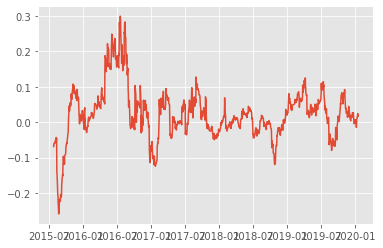

In [81]:
plt.plot(tdlist,homemade60)

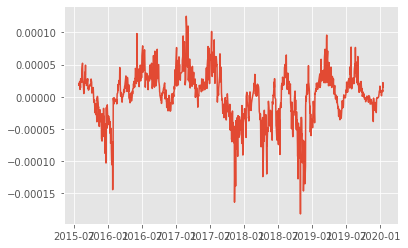

In [68]:
plt.plot(tdlist,homemade_1)